In [ ]:
# Import dependencies
import matplotlib as plt
import pandas as pd

In [ ]:
# Read Dataframe
tmdb_df = pd.read_csv('tmdb_df.csv')

# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Separate the genres to a list
tmdb_df['genres'] = tmdb_df['genres'].str.split(', ')

tmdb_df.head()

,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,"[Adventure, Drama, Science Fiction]","rescue, future, spacecraft, race against time,...",2014,4.25
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,"[Action, Adventure, Comedy]","superhero, anti hero, mercenary, based on comi...",2016,13.50
2,6,8.255,27713,2018-04-25,2052415039,149,300000000,tt4154756,154.340,"[Adventure, Action, Science Fiction]","sacrifice, magic, superhero, based on comic, s...",2018,6.84
3,8,7.906,26638,2014-07-30,772776600,121,170000000,tt2015381,33.255,"[Action, Science Fiction, Adventure]","spacecraft, based on comic, space, orphan, adv...",2014,4.55
4,15,8.263,23857,2019-04-24,2800000000,181,356000000,tt4154796,91.756,"[Adventure, Science Fiction, Action]","superhero, time travel, space travel, time mac...",2019,7.87


In [ ]:
# Prep data for analysis
# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Separate the genres to a list
tmdb_df['genres'] = tmdb_df['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


### Popularity of Genres Over Time
This section visualizes how the number of movies in each genre changes over the years.

            genres  release_year
0        Adventure          2014
0            Drama          2014
0  Science Fiction          2014
1           Action          2016
1        Adventure          2016


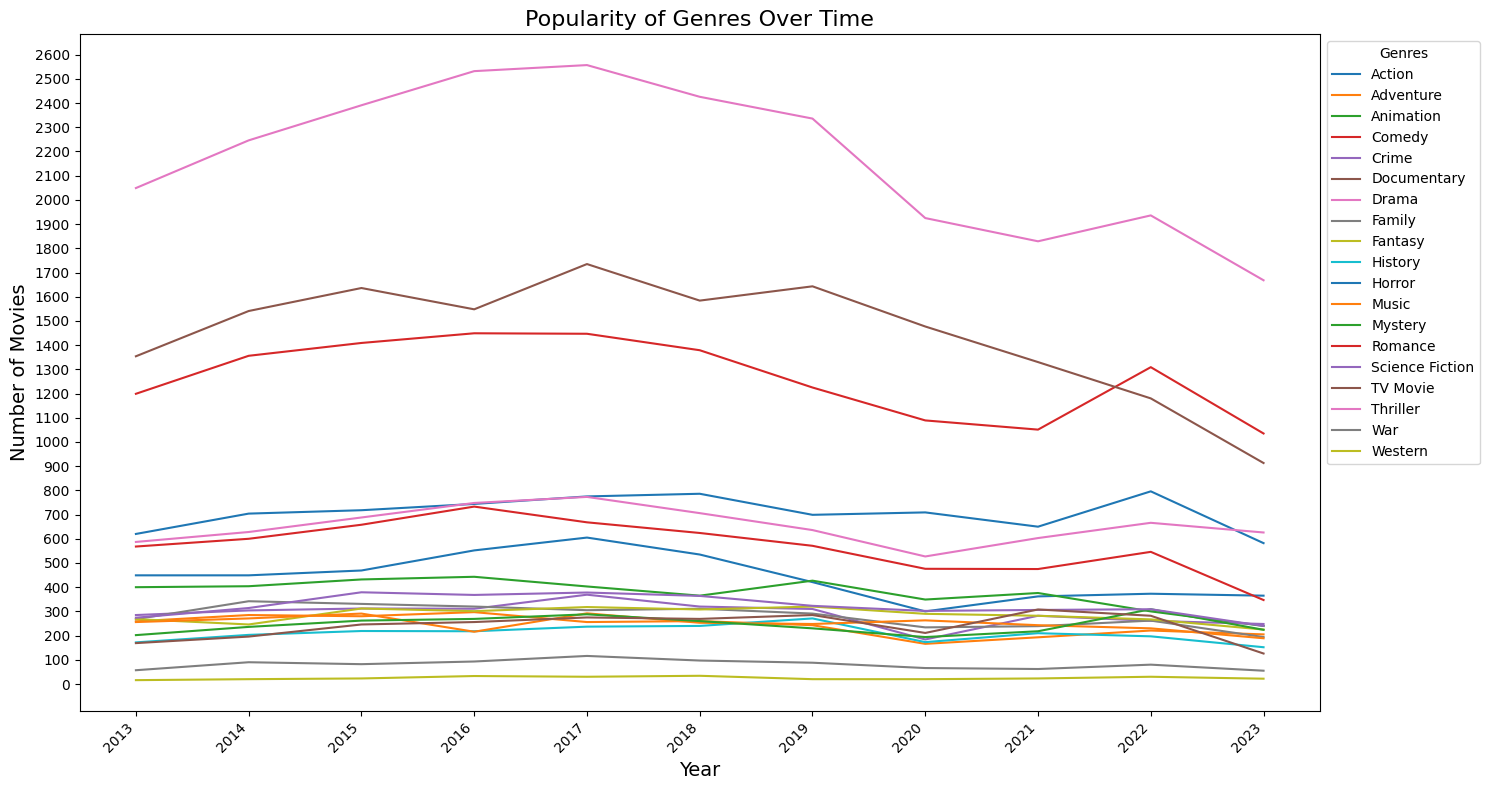

In [ ]:
# Explode the genres column
tmdb_df_exploded = tmdb_df.explode('genres')

# Extract the year from the release_date
tmdb_df_exploded['release_year'] = tmdb_df_exploded['release_date'].dt.year
print(tmdb_df_exploded[['genres', 'release_year']].head())

# Filter out rows with missing release_year
tmdb_df_exploded = tmdb_df_exploded.dropna(subset=['release_year'])

# Group by genres and year, then count movies
genre_popularity = tmdb_df_exploded.groupby(['genres', 'release_year']).size().reset_index(name='movie_count')

# Plot the popularity of genres over time
plt.figure(figsize=(15, 8))

years = sorted(tmdb_df_exploded['release_year'].unique())

for genre in genre_popularity['genres'].unique():
    subset = genre_popularity[genre_popularity['genres'] == genre]
    if not subset.empty:
        plt.plot(subset['release_year'], subset['movie_count'], label=genre)

plt.title('Popularity of Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Set x-axis ticks to show all years
plt.xticks(years, rotation=45, ha='right')

# Set y-axis ticks dynamically
if not genre_popularity['movie_count'].empty:
    max_movie_count = int(genre_popularity['movie_count'].max())
    plt.yticks(range(0, max_movie_count + 100, 100))  # Increment by 100
else:
    plt.yticks(range(0, 10, 10))  # Default range

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Genres")
plt.tight_layout()
plt.show()

### Genres with the Largest Box Office Revenue Relative to Budgets
This section identifies which genres yield the highest revenue relative to their budgets.

Top Genres by Revenue-to-Budget Ratio:
       genres  revenue_to_budget_ratio
1   Adventure             1.665858e+06
17        War             1.573952e+06
8     Fantasy             1.447237e+06
0      Action             1.262326e+06
2   Animation             1.139048e+06
9     History             1.087301e+06
4       Crime             8.364845e+05
12    Mystery             7.381658e+05
7      Family             6.263502e+05
13    Romance             4.659066e+05


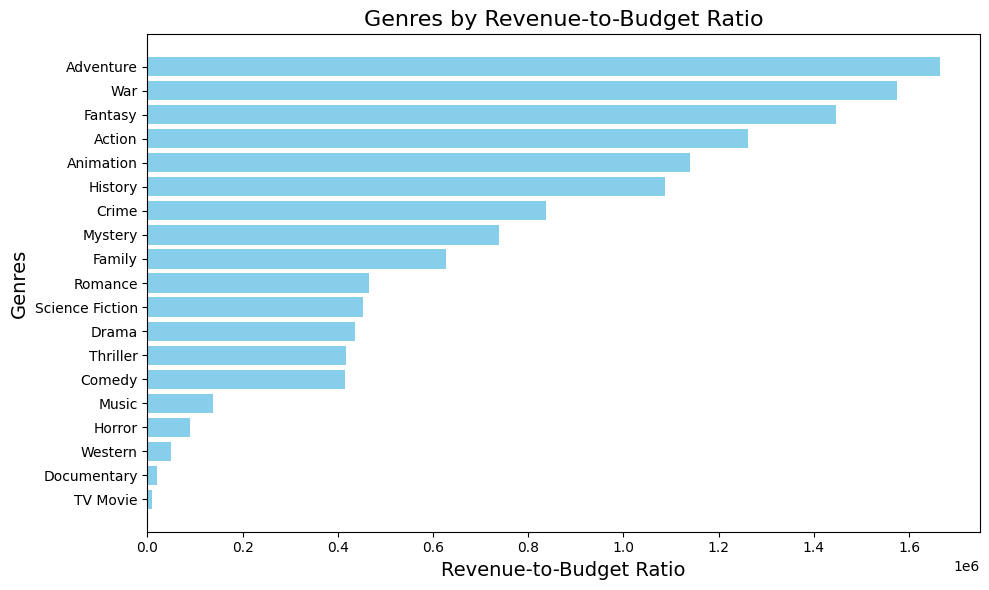

In [ ]:
# Replace zero budget values with 1
tmdb_df['budget'] = tmdb_df['budget'].replace(0, 1)

# Calculate revenue-to-budget ratio
tmdb_df['revenue_to_budget_ratio'] = tmdb_df['revenue'] / tmdb_df['budget']

# Explode the genres column
tmdb_df_exploded = tmdb_df.explode('genres')

# Group by genres and calculate the mean revenue-to-budget ratio
genre_revenue_ratio = tmdb_df_exploded.groupby('genres')['revenue_to_budget_ratio'].mean().reset_index()

# Sort by ratio in descending order
genre_revenue_ratio = genre_revenue_ratio.sort_values(by='revenue_to_budget_ratio', ascending=False)

# Display top genres by revenue-to-budget ratio
print("Top Genres by Revenue-to-Budget Ratio:")
print(genre_revenue_ratio.head(10))

# Bar plot for the top genres
plt.figure(figsize=(10, 6))
plt.barh(genre_revenue_ratio['genres'], genre_revenue_ratio['revenue_to_budget_ratio'], color='skyblue')
plt.title('Genres by Revenue-to-Budget Ratio', fontsize=16)
plt.xlabel('Revenue-to-Budget Ratio', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Genres with the Highest Average Popularity
This section determines the genres with the highest average popularity ratings.

Top Genres by Average Popularity:
             genres  popularity
1         Adventure   17.225097
0            Action   15.171885
8           Fantasy    9.498039
14  Science Fiction    9.345724
16         Thriller    9.044554
4             Crime    8.412834
12          Mystery    8.233017
7            Family    8.209561
2         Animation    7.460056
17              War    6.816725


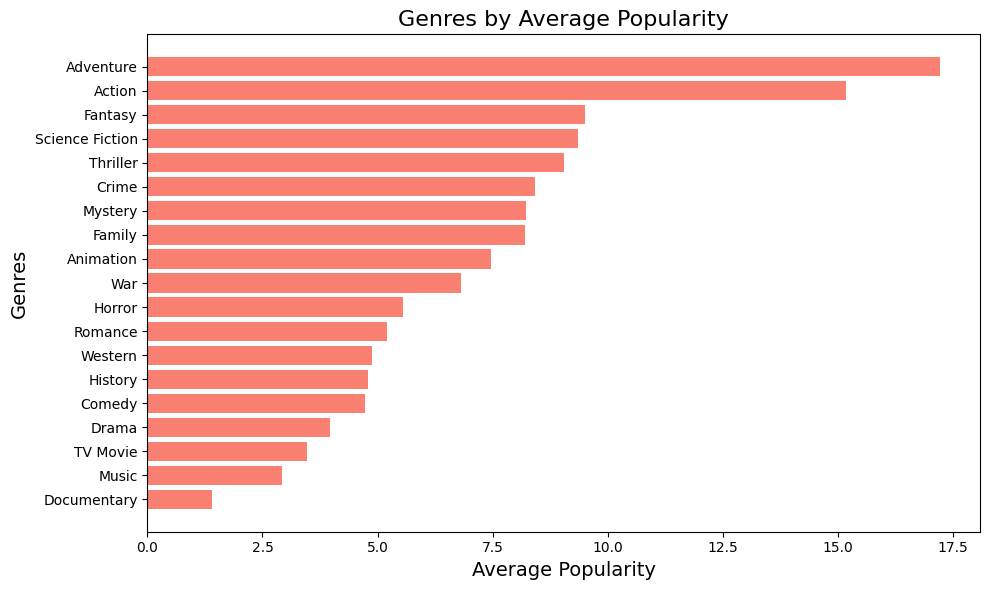

In [ ]:
# Explode the genres column
tmdb_df_exploded = tmdb_df.explode('genres')

# Group by genres and calculate the mean popularity
genre_popularity_avg = tmdb_df_exploded.groupby('genres')['popularity'].mean().reset_index()

# Sort by average popularity in descending order
genre_popularity_avg = genre_popularity_avg.sort_values(by='popularity', ascending=False)

# Display top genres by average popularity
print("Top Genres by Average Popularity:")
print(genre_popularity_avg.head(10))

# Bar plot for the top genres
plt.figure(figsize=(10, 6))
plt.barh(genre_popularity_avg['genres'], genre_popularity_avg['popularity'], color='salmon')
plt.title('Genres by Average Popularity', fontsize=16)
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
